In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import comb, factorial, exp

In [46]:
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, header=None).squeeze()
        return data
    except Exception as e:
        print(f"Ошибка при загрузке файла {file_path}: {e}")
        return None

file_paths = ['set_1.csv', 'set_2.csv', 'set_3.csv']
datasets = [load_data(fp) for fp in file_paths]

for i, data in enumerate(datasets):
    if data is not None:
        print(f"Набор данных {i+1} успешно загружен. Количество элементов: {len(data)}")

Набор данных 1 успешно загружен. Количество элементов: 100000
Набор данных 2 успешно загружен. Количество элементов: 10000
Набор данных 3 успешно загружен. Количество элементов: 100000


In [47]:
def remove_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Удаление выбросов
datasets = [remove_outliers_iqr(data) for data in datasets]

In [49]:
def calculate_mean(data):
    return np.mean(data)

def calculate_variance(data):
    return np.var(data)

# Расчет параметров для каждого набора данных
for i, data in enumerate(datasets):
    mean = calculate_mean(data)
    variance = calculate_variance(data)
    print(f"Набор данных {i+1}: Математическое ожидание = {mean:.4f}, Дисперсия = {variance:.4f}")

Набор данных 1: Математическое ожидание = 2.8508, Дисперсия = 3.6321
Набор данных 2: Математическое ожидание = 19.5122, Дисперсия = 6846.9818
Набор данных 3: Математическое ожидание = 0.1055, Дисперсия = 0.0080


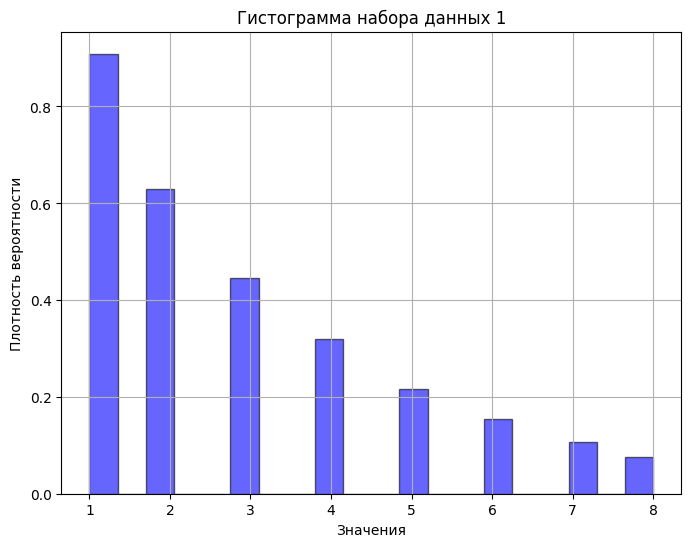

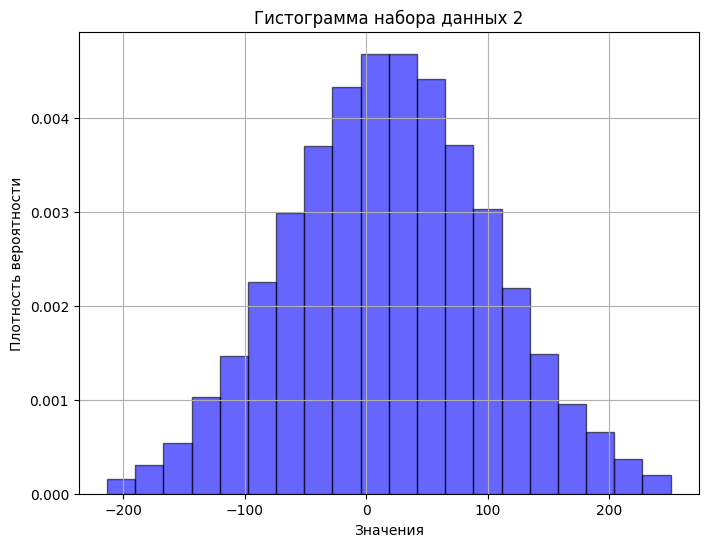

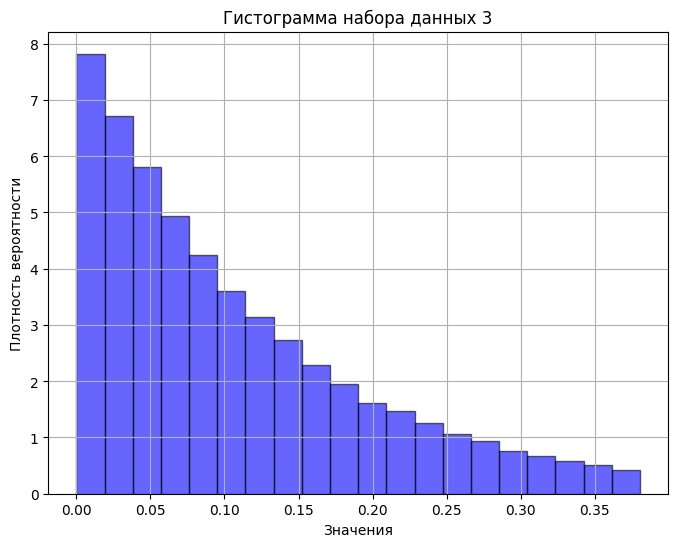

In [54]:
# Построение гистограмм
for i, data in enumerate(datasets):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
    plt.title(f'Гистограмма набора данных {i+1}')
    plt.xlabel('Значения')
    plt.ylabel('Плотность вероятности')
    plt.grid(True)
    plt.show()

In [ ]:
# 1. Геометрическое распределение
def geometric_distribution(p, k):
    """
    p - вероятность успеха
    k - количество испытаний до первого успеха
    """
    return p * ((1 - p) ** (k - 1))

# 2. Биномиальное распределение
def binomial_distribution(n, p, k):
    """
    n - количество испытаний
    p - вероятность успеха
    k - количество успехов
    """
    return comb(n, k) * ((p ** k) * ((1 - p) ** (n - k)))

# 3. Распределение Пуассона
def poisson_distribution(lmbda, k):
    """
    lmbda - среднее количество событий
    k - количество событий
    """
    return ((lmbda ** k) * np.exp(-lmbda)) / factorial(k)

# 4. Равномерное распределение
def uniform_distribution(a, b, x):
    """
    a - нижняя граница
    b - верхняя граница
    x - значение
    """
    return (1 / (b - a)) if (a <= x <= b) else 0

# 5. Нормальное распределение
def normal_distribution(mu, sigma, x):
    """
    mu - математическое ожидание
    sigma - стандартное отклонение
    x - значение
    """
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(((x - mu) ** 2) / (2 * (sigma ** 2))))

# 6. Экспоненциальное распределение
def exponential_distribution(lmbda, x):
    """
    lmbda - параметр интенсивности
    x - значение
    """
    return lmbda * np.exp(-(lmbda * x))

In [ ]:
def plot_distributions(data, title):
    plt.figure(figsize=(8, 6))
    
    # Построение гистограммы
    plt.hist(data, bins=20, density=True, alpha=0.6, color='b', edgecolor='black', label='Гистограмма')
    
    # Параметры для распределений
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.sqrt(variance)
    min_val = np.min(data)
    max_val = np.max(data)
    x = np.linspace(min_val, max_val, 1000)
    
    # Нормальное распределение
    if std_dev > 0:
        y_normal = [normal_distribution(mean, std_dev, xi) for xi in x]
        plt.plot(x, y_normal, 'r-', label='Нормальное распределение')
    
    # Экспоненциальное распределение
    if mean > 0 and np.all(data >= 0):
        lmbda_exp = 1 / mean
        y_exp = [exponential_distribution(lmbda_exp, xi) for xi in x]
        plt.plot(x, y_exp, 'g-', label='Экспоненциальное распределение')
    
    # Равномерное распределение
    if min_val < max_val:
        y_uniform = [uniform_distribution(min_val, max_val, xi) for xi in x]
        plt.plot(x, y_uniform, 'm-', label='Равномерное распределение')
    
    # Распределение Пуассона
    if mean > 0 and np.all(data >= 0) and np.all(data == np.floor(data)):
        lmbda_poisson = mean
        y_poisson = [poisson_distribution(lmbda_poisson, int(xi)) for xi in x]
        plt.plot(x, y_poisson, 'c-', label='Распределение Пуассона')
    
    # Геометрическое распределение
    if mean > 0 and np.all(data >= 1) and np.all(data == np.floor(data)):
        p_geo = 1 / mean  # Оценка вероятности успеха
        if 0 < p_geo < 1:  # Проверка, что p находится в допустимом диапазоне
            y_geo = [geometric_distribution(p_geo, int(xi)) for xi in x]
            plt.plot(x, y_geo, 'y-', label='Геометрическое распределение')
    
    # Биномиальное распределение
    if mean > 0 and np.all(data >= 0) and np.all(data == np.floor(data)):
        n_binom = len(data)
        p_binom = mean / n_binom if n_binom > 0 else None
        if p_binom and 0 < p_binom < 1:  # Вероятность должна быть в интервале (0, 1)
            y_binom = [binomial_distribution(n_binom, p_binom, int(xi)) for xi in x]
            plt.plot(x, y_binom, 'k-', label='Биномиальное распределение')
    
    # Оформление графика
    plt.title(title)
    plt.xlabel('Значения')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid(True)
    plt.show()

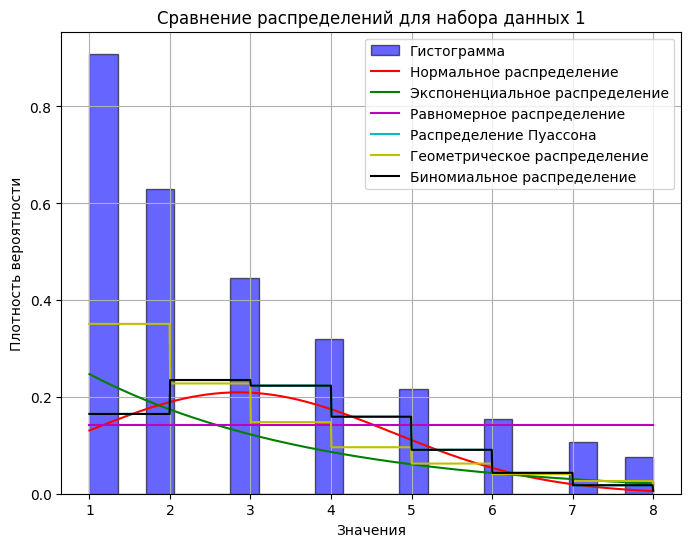

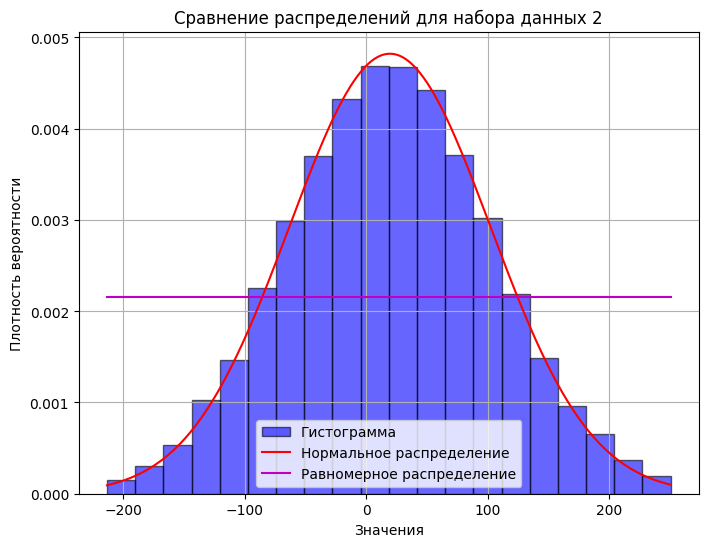

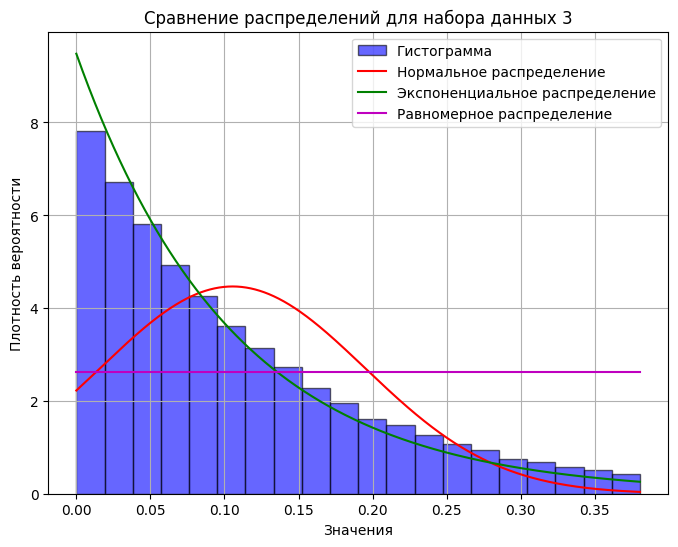

In [56]:
for i, data in enumerate(datasets):
    plot_distributions(data, f'Сравнение распределений для набора данных {i+1}')